In [1]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
#import csv files
filepath = os.path.join(".", "raw_data", "city_data.csv")
city_data_df = pd.read_csv(filepath)
#city_data_df.head()

In [3]:
filepath = os.path.join(".", "raw_data", "ride_data.csv")
ride_data_df = pd.read_csv(filepath)
#ride_data_df.head()

In [4]:
groupby_rides = ride_data_df.groupby(["city"])
average_fare = groupby_rides["fare"].mean()
average_fare = average_fare.to_frame()
average_fare = average_fare.reset_index(drop=False)
#average_fare.head()

In [5]:
rides_per_city = groupby_rides["ride_id"].count()
rides_per_city = rides_per_city.to_frame()
rides_per_city =rides_per_city.reset_index(drop=False)
#rides_per_city.head()

In [6]:
pyber_df=pd.merge(city_data_df, average_fare, on = "city")
#pyber_df.head()

In [7]:
pyber_df=pd.merge(pyber_df, rides_per_city, on = "city")
#pyber_df.head()

In [8]:
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship 
#between four key variables:
urban_df = pyber_df.loc[pyber_df['type'] == 'Urban']
#urban_df.head()

In [9]:
suburban_df = pyber_df.loc[pyber_df['type'] == 'Suburban']
#suburban_df.head()

In [10]:
rural_df = pyber_df.loc[pyber_df['type'] == 'Rural']
#rural_df.head()

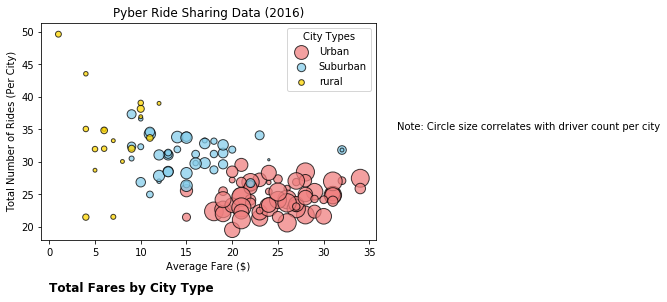

In [11]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)
plt.scatter(urban_df["ride_id"], urban_df["fare"], marker="o", facecolors="lightcoral", edgecolors="black", s=(urban_df["driver_count"] * 5), alpha=0.75, label="Urban")
plt.scatter(suburban_df["ride_id"], suburban_df["fare"], marker="o", facecolors="skyblue", edgecolors="black", s=(suburban_df["driver_count"] * 5), alpha=0.75, label="Suburban")
plt.scatter(rural_df["ride_id"], rural_df["fare"], marker="o", facecolors="gold", edgecolors="black", s=(rural_df["driver_count"] * 5), alpha=0.75, label="rural")
#plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
plt.legend(title="City Types")
data = "Note: Circle size correlates with driver count per city"
main_title = "Total Fares by City Type"
plt.text(38,35,data)
plt.text(0,10,main_title,fontsize=12,fontweight="bold")
plt.savefig("pyberbubblechart.png")
plt.show()

In [12]:
# In addition, you will be expected to produce the following three pie charts:
# * % of Total Fares by City Type
# * % of Total Rides by City Type
# * % of Total Drivers by City Type
groupby_type = pyber_df.groupby(["type"]).sum()
groupby_type = groupby_type.reset_index(drop=False)
groupby_type.head()

,type,driver_count,fare,ride_id
0,Rural,104,615.728572,125
1,Suburban,638,1300.433953,657
2,Urban,2607,1623.863390,1625


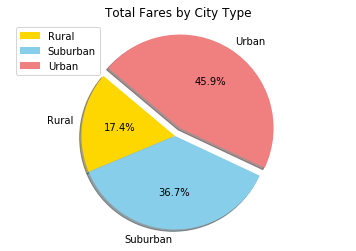

In [13]:
# * % of Total Fares by City Type
colors = ['gold', 'skyblue', 'lightcoral']
groupby_type.plot(kind='pie', y='fare', autopct='%1.1f%%', colors=colors, explode = (0, 0, 0.1), startangle=140, shadow=True, labels=groupby_type['type'], legend = True)
plt.axis("equal")
plt.axes().set_ylabel('')
plt.title("Total Fares by City Type")
plt.savefig("faresbycitytype.png")
plt.show()

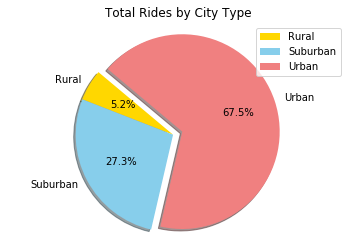

In [14]:
# * % of Total Rides by City Type
colors = ['gold', 'skyblue', 'lightcoral']
groupby_type.plot(kind='pie', y='ride_id', autopct='%1.1f%%', colors=colors, explode = (0, 0, 0.1), startangle=140, shadow=True, labels=groupby_type['type'], legend = True)
plt.axis("equal")
plt.axes().set_ylabel('')
plt.title("Total Rides by City Type")
plt.savefig("ridesbycitytype.png")
plt.show()

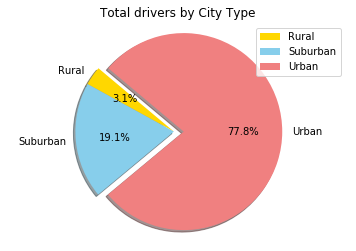

In [15]:
# * % of Total Drivers by City Type
colors = ['gold', 'skyblue', 'lightcoral']
groupby_type.plot(kind='pie', y='driver_count', autopct='%1.1f%%', colors=colors, explode = (0, 0, 0.1), startangle=140, shadow=True, labels=groupby_type['type'], legend = True)
plt.axis("equal")
plt.axes().set_ylabel('')
plt.title("Total drivers by City Type")
plt.savefig("driversbycitytype.png")
plt.show()

In [16]:
# * You must use the Pandas Library and the Jupyter Notebook.
# * You must use Matplotlib for all plotting.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
# * Remember when making your plots to consider aesthetics!
#   * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#   * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
# * You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
# * See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.